# Unit 5: Simulation of sampling with replacement

## 1 Introduction

This notebook simulates the activity from the previous class: 

Each team was given an envelope with an unknown population of tiles with numbers {1,2,3,4,5,6}.
We randomly selected one tile from the population, took note of the number on the tile
and returned the tile back into the envelope. This type of repeated sampling from the population is known as "*sampling with replacement*".

The question of interest: **What is a large enough sample size so that we can distinguish between to different populations?** 

The experiment was designed to distinguish between two types of populations:

1. All numbers are evenly distributed: the probability of the event '*tile shows number x*' is the same for all possible numbers.
2. One number has a lower probability than the rest of the numbers.


Suprisingly, it takes quite a few samples before the random fluctuations in the relative frequency of each event is reduced. The more samples we have in our data set, the more accurate is the estimated relative frequency for each event.



## 2. How can we simulate a random process like the sampling from a bag with tiles?

First of all, we have to be able to generate random numbers. That's possible with numpy. Numpy can generate discrete (integer) numbers with equal probability within a defined range (e.g. integers 1,2,3,4,5,6).

The function that produces evenly (uniformly) distributed integer numbers is
*np.random.randint*



In [1]:
import numpy as np
import matplotlib.pyplot as plt

help(np.random.randint)

Help on built-in function randint:

randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    .. note::
        New code should use the ``integers`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distributi

## 2.1 The basics of working with random numbers

In order to simulate the experiment of sampling from the bag of tiles we need a few parameters that control the simulation:

* define the 'event space': {1,2,3,4,5,6}, this we do here with the integer variables i1 and i2.
* we define a list with the event numbers for the plotting of the results
* it is of course a good idea to use a variable that controls the sample size


In [15]:
n=30 # sample size
i1 ,i2 = 1, 6+1
sample=np.random.randint(i1,i2,size=n)
print(sample)

[4 1 1 3 5 6 1 1 2 6 4 1 3 5 6 4 5 4 5 4 3 6 2 1 2 6 1 6 6 5]


## 2.2 Calculate relative frequencies

Function ___np.histogram___ allows us to calculate the frequency of events falling into a specific value range.


We see here the basic usage, and followed an improved customization of the 
numerical partition of the event space into proper bins for our discrete events.



In [16]:
# our events are the numbers on a dice (or numbers on a tile)
event=      [    1,    2,    3,    4,    5,    6    ]


# we can get the numerical results
count, bin_edges=np.histogram(sample,bins=6)

i=0
print ("frequency of the events")
while i<len(count):
    print ("tile="+str(event[i])+" :"+str(count[i]))
    i=i+1
print ("----------------")
print ("checksum : "+str(sum(count)))

frequency of the events
tile=1 :7
tile=2 :3
tile=3 :3
tile=4 :5
tile=5 :5
tile=6 :7
----------------
checksum : 30


In [17]:
# for the histograms we need the control of the bins
event=      [    1,    2,    3,    4,    5,    6    ]
# Note the borders for our bins (event ranges)
bin_borders=[0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]
# we can get the numerical results
count, bin_edges =np.histogram(sample,bins=bin_borders)

# convert our event counts in into relative frequencies
rel_freq=count/sum(count)



## 2.3 Text-based summary of the results (e.g. for tables in research reports)

In [18]:
i=0
print ("Relative frequency of the events")
while i<len(count):
    print ("tile="+str(event[i])+" :"+str(rel_freq[i]))
    i=i+1
print ("----------------")
print ("checksum : "+str(sum(rel_freq)))

Relative frequency of the events
tile=1 :0.23333333333333334
tile=2 :0.1
tile=3 :0.1
tile=4 :0.16666666666666666
tile=5 :0.16666666666666666
tile=6 :0.23333333333333334
----------------
checksum : 1.0


### 2.3.1 We can improve the output by rounding the float numbers.

In Python, we can do this with a little help of Google search on examples using f-string formatting of float numbers.
Here is the above code with fstring formatting example.

In [19]:
i=0
print ("Relative frequency of the events")
while i<len(count):
    print (f"tile={event[i]} : {rel_freq[i]}")
    i=i+1
print ("----------------")
print ("checksum : "+str(sum(rel_freq)))

Relative frequency of the events
tile=1 : 0.23333333333333334
tile=2 : 0.1
tile=3 : 0.1
tile=4 : 0.16666666666666666
tile=5 : 0.16666666666666666
tile=6 : 0.23333333333333334
----------------
checksum : 1.0


## 2.3.2 Formatting instructions for float values:

Now that we have seen how variables can be 'planted' into f-strings and their values gets inserted into the string automatically, we can add formatting instructions. These are a bit cryptic but 
one can learn from examples.

[(See here for some examples)](https://www.pythonmorsels.com/string-formatting/)

In [20]:
i=0
print ("Relative frequency of the events")
while i<len(count):
    print (f"tile={event[i]:1d}   : {rel_freq[i]:.2f}")
    i=i+1
print ("----------------")
print (f"checksum : { sum(rel_freq):.2f}")

Relative frequency of the events
tile=1   : 0.23
tile=2   : 0.10
tile=3   : 0.10
tile=4   : 0.17
tile=5   : 0.17
tile=6   : 0.23
----------------
checksum : 1.00


## 2.4 Histogram plot 

Aside from the long parameter list that allows us to adjust the colors of the plot, there is one important optional parameter to switch into the mode showing relative frequencies: *density=True*

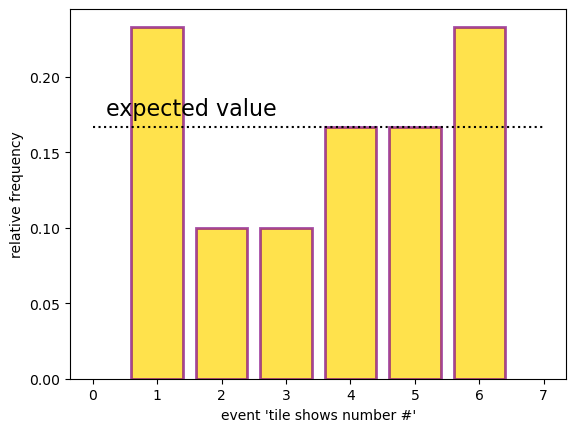

In [21]:
plt.hist(sample,bins=bin_borders,rwidth=0.8,lw=2,edgecolor='purple',facecolor='gold',alpha=0.7,density=True)
plt.ylabel("relative frequency")
plt.xlabel("event 'tile shows number #'")
plt.text(0.2,0.175, 'expected value',fontsize=16)
plt.plot([0,7],[1/6, 1/6],':',color='black')

## 3. Summary

* Numpy offers random number generators that produce discrete events (integer numbers) with equal probability (*np.random.randint*). We use the function to simulate the class experiment: 'sampling tiles from an evenlope with even distribution of all numbers'. 
* Numpy has a function (*np.histogram*) that calculates the frequency of events (integer or real numbers) falling inside a certain bin (range of values)


## 4. Next steps

We cannot simulate the experiment with a population with non-uniform distribution. One solution how we can do this with the same same numpy function will be shown in the next notebook.

---
## 5. Supplementary information: 

Help on np.histogram 

In [22]:
help(np.histogram)

Help on function histogram in module numpy:

histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
    Compute the histogram of a dataset.
    
    Parameters
    ----------
    a : array_like
        Input data. The histogram is computed over the flattened array.
    bins : int or sequence of scalars or str, optional
        If `bins` is an int, it defines the number of equal-width
        bins in the given range (10, by default). If `bins` is a
        sequence, it defines a monotonically increasing array of bin edges,
        including the rightmost edge, allowing for non-uniform bin widths.
    
        .. versionadded:: 1.11.0
    
        If `bins` is a string, it defines the method used to calculate the
        optimal bin width, as defined by `histogram_bin_edges`.
    
    range : (float, float), optional
        The lower and upper range of the bins.  If not provided, range
        is simply ``(a.min(), a.max())``.  Values outside the range are
        ig